### Is there any relationship of the spread of covid in the country and how happy the people are living in the country?

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#Import the dataset
covid_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,98,101,101,101,101,101,106,107,107,107
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,702484,711325,723132,736609,751001,765002,779689,790818,798486,809728
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,49072,49400,49574,49901,50359,50850,51382,51925,52496,52677
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,4218,4218,4220,4224,4227,4231,4232,4234,4235,4246


### Now if we look closer, we will find that there is no use for latitude and longitude because we already have the country/region, so, we can drop those two columns

In [3]:
covid_df.drop(["Lat", "Long"], axis=1, inplace=True)

In [4]:
covid_df.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,39192,39227,39233,39254,39268,39285,39290,39297,39341,39422
1,NaN,Albania,0,0,0,0,0,0,0,0,...,13153,13259,13391,13518,13649,13806,13965,14117,14266,14410
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,50914,51067,51213,51368,51530,51690,51847,51995,52136,52270
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1836,1836,1966,1966,2050,2050,2110,2110,2110,2370
4,NaN,Angola,0,0,0,0,0,0,0,0,...,4672,4718,4797,4905,4972,5114,5211,5370,5402,5530
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,98,101,101,101,101,101,106,107,107,107
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,702484,711325,723132,736609,751001,765002,779689,790818,798486,809728
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,49072,49400,49574,49901,50359,50850,51382,51925,52496,52677
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,4218,4218,4220,4224,4227,4231,4232,4234,4235,4246


### Now, to look closer, we can aggregate the data according to the country to get even better clarity

In [5]:
covid_df_aggregated = covid_df.groupby("Country/Region").sum()

### Notice that the shape of the dataframe has changed, and this is because we have aggregated and so the total number of countries is the number of columns and so are the number of rows.

### Now we can use the basic matplotlib plot to visualize the trends

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

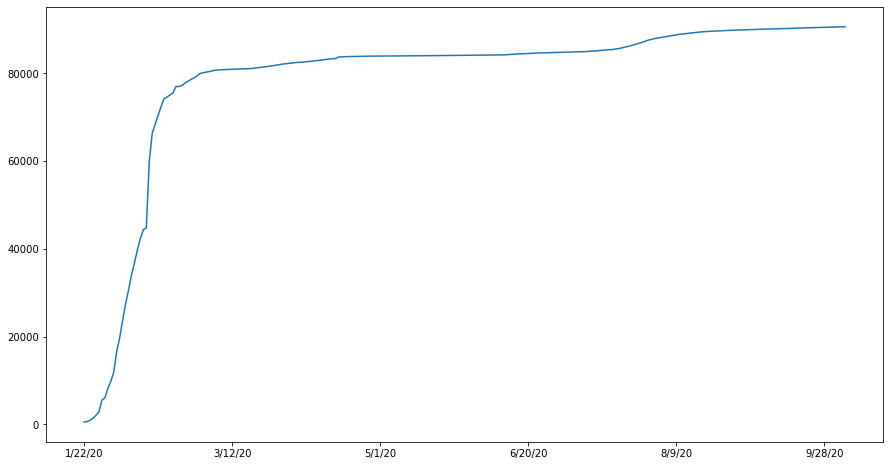

In [6]:
plt.figure(figsize=(15,8))
covid_df_aggregated.loc["China"].plot()

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

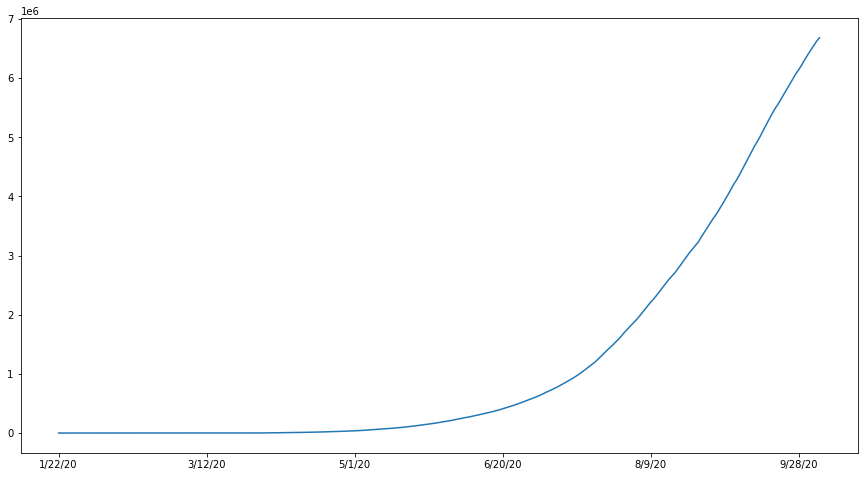

In [7]:
plt.figure(figsize=(15,8))
covid_df_aggregated.loc["India"].plot()

### Now that we have the trends of the two countries, we can see the maximum number of cases recorded in a day. We can do this by taking thr first derivative of the aggregated function, that will give the change in the curve in 24hours.

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

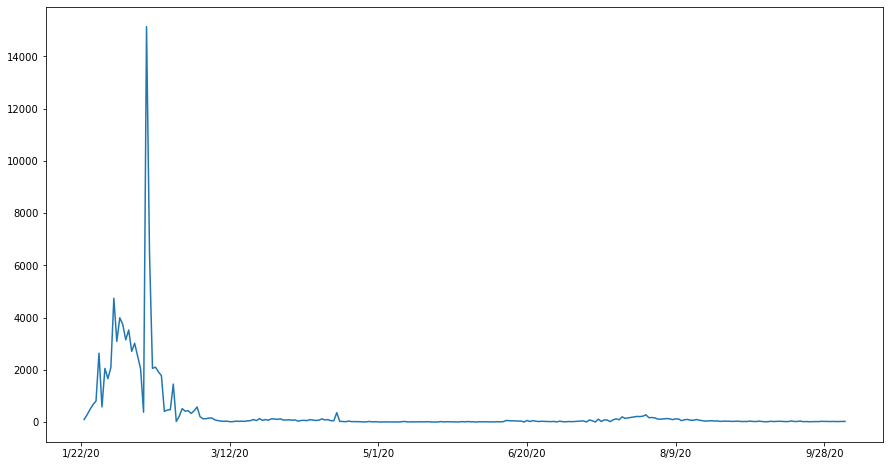

In [8]:
plt.figure(figsize=(15,8))
covid_df_aggregated.loc["China"].diff().plot()

### The spike that we can see is the maximum number of cases yet

In [9]:
covid_df_aggregated.loc["China"].diff().max()

15136.0

### So, this is the maximum number of cases recorded in China yet

D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

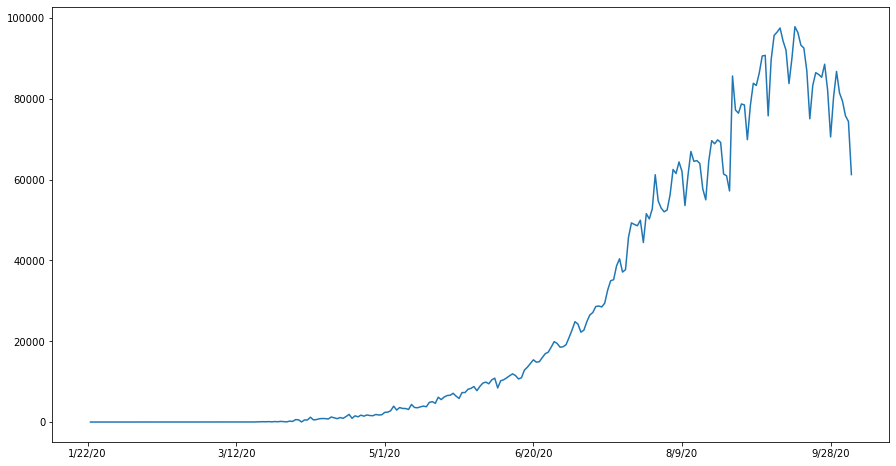

In [10]:
plt.figure(figsize=(15,8))
covid_df_aggregated.loc["India"].diff().plot()

In [11]:
covid_df_aggregated.loc["India"].diff().max()

97894.0

### Woah, that is a huge number

### We now can have a count of the maximum number of cases for each country

In [12]:
countries = list(covid_df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_df_aggregated.loc[c].diff().max())

In [13]:
max_infection_rates

[915.0,
 178.0,
 675.0,
 260.0,
 159.0,
 39.0,
 14687.0,
 771.0,
 716.0,
 1321.0,
 590.0,
 220.0,
 841.0,
 4019.0,
 12.0,
 973.0,
 3389.0,
 113.0,
 139.0,
 29.0,
 2036.0,
 811.0,
 354.0,
 69074.0,
 26.0,
 503.0,
 193.0,
 1291.0,
 78.0,
 149.0,
 31.0,
 2324.0,
 2883.0,
 216.0,
 83.0,
 13990.0,
 15136.0,
 15318.0,
 44.0,
 649.0,
 414.0,
 1947.0,
 430.0,
 369.0,
 93.0,
 58.0,
 3796.0,
 823.0,
 99.0,
 280.0,
 6.0,
 2147.0,
 11536.0,
 1774.0,
 449.0,
 1750.0,
 31.0,
 134.0,
 147.0,
 1829.0,
 5.0,
 267.0,
 34780.0,
 570.0,
 248.0,
 578.0,
 6933.0,
 1513.0,
 460.0,
 6.0,
 4233.0,
 278.0,
 156.0,
 133.0,
 332.0,
 3.0,
 1141.0,
 1322.0,
 99.0,
 97894.0,
 4823.0,
 3902.0,
 5055.0,
 1515.0,
 11316.0,
 6557.0,
 244.0,
 1762.0,
 1824.0,
 18757.0,
 960.0,
 851.0,
 695.0,
 1073.0,
 11505.0,
 3.0,
 95.0,
 1321.0,
 98.0,
 45.0,
 1085.0,
 21.0,
 172.0,
 234.0,
 7.0,
 614.0,
 257.0,
 432.0,
 215.0,
 81.0,
 106.0,
 227.0,
 41.0,
 28115.0,
 1022.0,
 12.0,
 56.0,
 714.0,
 2760.0,
 305.0,
 316.0,
 2722.0,
 4

### We can add a new column recording the max counts

In [14]:
covid_df_aggregated["max_infection_rate"] = max_infection_rates

In [15]:
covid_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39227,39233,39254,39268,39285,39290,39297,39341,39422,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,13259,13391,13518,13649,13806,13965,14117,14266,14410,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,51067,51213,51368,51530,51690,51847,51995,52136,52270,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1836,1966,1966,2050,2050,2110,2110,2110,2370,260.0
Angola,0,0,0,0,0,0,0,0,0,0,...,4718,4797,4905,4972,5114,5211,5370,5402,5530,159.0


D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

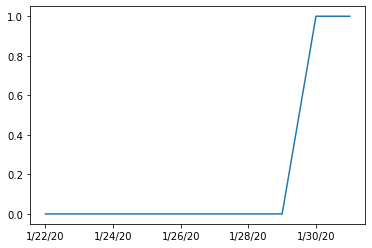

In [16]:
covid_df_aggregated.loc["India"][:10].plot()

### Importing the world hapiness dataset to see which countries are the most happiest

In [17]:
hapiness_df = pd.read_csv('2019.csv')

In [18]:
hapiness_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Dropping the useless columns in the dataframe

In [19]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [20]:
hapiness_df.drop(useless_cols, axis=1, inplace=True)
hapiness_df.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### We have removed those columns because we only want the factors which actually affect the lives of the people

### We now can make the country names as the index of the dataframe so as to make it easier to join with the covid dataframe

In [21]:
hapiness_df.set_index("Country or region", inplace=True)

In [22]:
hapiness_df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### We want to use inner join on the two dataframes because the number of countries don't match.

In [23]:
covid_df_aggregated.shape

(188, 259)

In [24]:
hapiness_df.shape

(156, 4)

In [25]:
data = covid_df_aggregated.join(hapiness_df, how="inner")[["max_infection_rate", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,178.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,14687.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [26]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.118921,0.071059,0.118471,0.088057
GDP per capita,0.118921,1.000000,0.757521,0.859431,0.394799
Social support,0.071059,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.118471,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.088057,0.394799,0.456317,0.423146,1.000000


### We can now visualize the results

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

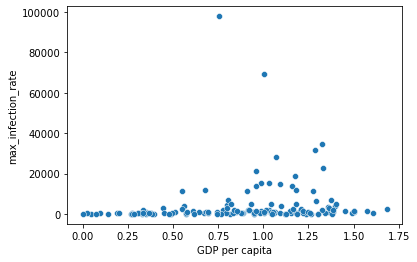

In [27]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x, y)

### We cannot see the points properly, and that is because the difference of scale between the axes. Therefore, we have to convert the max_infection_rate to log scale

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

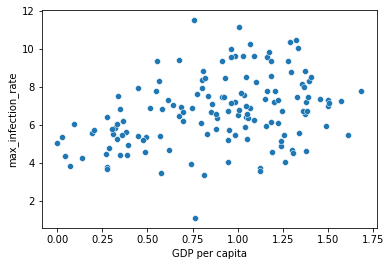

In [28]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

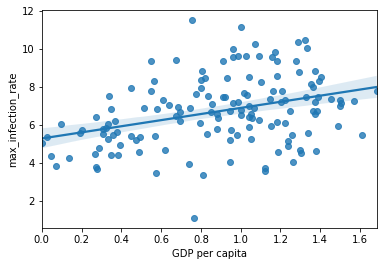

In [29]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.regplot(x, np.log(y))

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

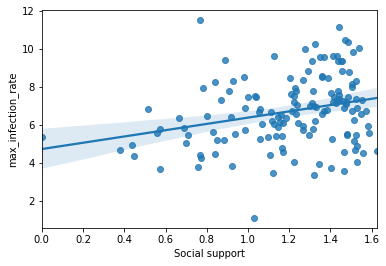

In [30]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.regplot(x, np.log(y))

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

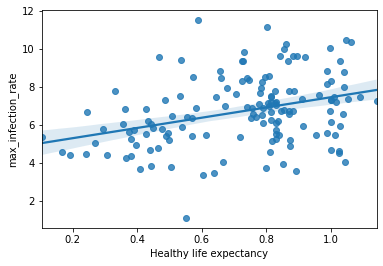

In [31]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.regplot(x, np.log(y))

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

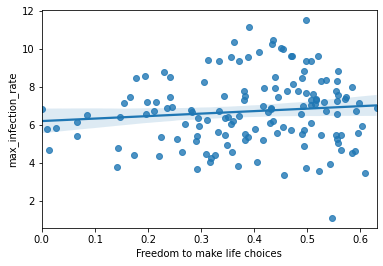

In [32]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.regplot(x, np.log(y))

### We get to know from these plots that there are more cases in developed countries.

In [33]:
covid_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39227,39233,39254,39268,39285,39290,39297,39341,39422,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,13259,13391,13518,13649,13806,13965,14117,14266,14410,178.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,51067,51213,51368,51530,51690,51847,51995,52136,52270,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,1836,1966,1966,2050,2050,2110,2110,2110,2370,260.0
Angola,0,0,0,0,0,0,0,0,0,0,...,4718,4797,4905,4972,5114,5211,5370,5402,5530,159.0


### Importing the global deaths dataset

In [54]:
covid_deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
covid_deaths_df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,375,377,380,384,387,388,389,392,396,400
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,171,174,176,179,183,185,189,193,195,199
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,15543,15749,16113,16519,16937,20288,20599,20795,21018,21468
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,948,951,957,958,959,963,966,972,977,984
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


In [55]:
covid_deaths_df.drop(["Lat", "Long"], axis=1, inplace=True)

In [56]:
covid_death_df_aggregated = covid_deaths_df.groupby("Country/Region").sum()

In [57]:
covid_death_df_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1453,1453,1455,1458,1458,1458,1458,1462,1462,1466
Albania,0,0,0,0,0,0,0,0,0,0,...,375,377,380,384,387,388,389,392,396,400
Algeria,0,0,0,0,0,0,0,0,0,0,...,1711,1714,1719,1726,1736,1741,1749,1756,1760,1768
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,171,174,176,179,183,185,189,193,195,199
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
Argentina,0,0,0,0,0,0,0,0,0,0,...,15543,15749,16113,16519,16937,20288,20599,20795,21018,21468
Armenia,0,0,0,0,0,0,0,0,0,0,...,948,951,957,958,959,963,966,972,977,984
Australia,0,0,0,0,0,0,0,0,0,0,...,872,875,882,886,888,890,893,894,894,895


D:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

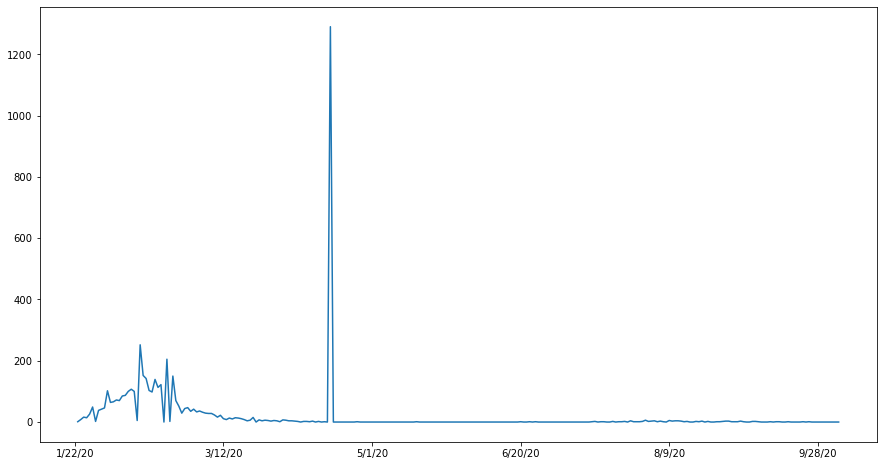

In [58]:
plt.figure(figsize=(15,8))
covid_death_df_aggregated.loc["China"].diff().plot()

In [59]:
countries = list(covid_death_df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(covid_death_df_aggregated.loc[c].diff().max())

In [60]:
covid_death_df_aggregated["max_death_rate"] = max_infection_rates

In [61]:
covid_death_df_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1453,1455,1458,1458,1458,1458,1462,1462,1466,46.0
Albania,0,0,0,0,0,0,0,0,0,0,...,377,380,384,387,388,389,392,396,400,6.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,1714,1719,1726,1736,1741,1749,1756,1760,1768,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,174,176,179,183,185,189,193,195,199,6.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,1.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,15749,16113,16519,16937,20288,20599,20795,21018,21468,3351.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,951,957,958,959,963,966,972,977,984,19.0
Australia,0,0,0,0,0,0,0,0,0,0,...,875,882,886,888,890,893,894,894,895,59.0


In [62]:
data_death = covid_death_df_aggregated.join(hapiness_df, how="inner")[["max_death_rate", "GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices"]]
data_death.head()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,46.0,0.350,0.517,0.361,0.000
Albania,6.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,3351.0,1.092,1.432,0.881,0.471
Armenia,19.0,0.850,1.055,0.815,0.283


D:\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

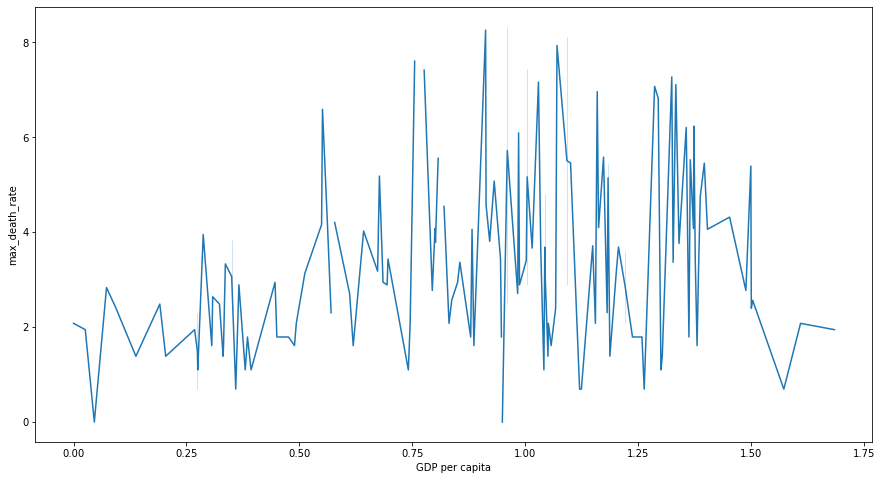

In [78]:
x = data_death["GDP per capita"]
y = data_death["max_death_rate"]
plt.figure(figsize=(15,8))
sns.lineplot(x, np.log(y))

In [72]:
data_death["GDP per capita"].max()

1.6840000000000002

### We have to classify countries on the basis of GDP per Capita in order to determine the cases in developed countries

### GDP per capita range :
#### -> 1.0< - Developed
#### -> 0.5 < GDP per capita < 1.0 - Developing
#### -> 0.5> - Not Developed

In [73]:
gdp_classification = []
for gdp in data_death["GDP per capita"]:
    if gdp > 1.0:
        gdp_classification.append("Developed")
    elif gdp <= 1.0 and gdp > 0.5:
        gdp_classification.append("Developing")
    else:
        gdp_classification.append("Not Developed")

In [74]:
data_death["GDP_Classificaation"] = gdp_classification

In [75]:
data_death.head(10)

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,GDP_Classificaation
Afghanistan,46.0,0.350,0.517,0.361,0.000,Not Developed
Albania,6.0,0.947,0.848,0.874,0.383,Developing
Algeria,30.0,1.002,1.160,0.785,0.086,Developed
Argentina,3351.0,1.092,1.432,0.881,0.471,Developed
Armenia,19.0,0.850,1.055,0.815,0.283,Developing
Australia,59.0,1.372,1.548,1.036,0.557,Developed
Austria,30.0,1.376,1.475,1.016,0.532,Developed
Azerbaijan,13.0,1.043,1.147,0.769,0.351,Developed
Bahrain,6.0,1.362,1.368,0.871,0.536,Developed
Bangladesh,64.0,0.562,0.928,0.723,0.527,Developing


D:\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP_Classificaation', ylabel='max_death_rate'>

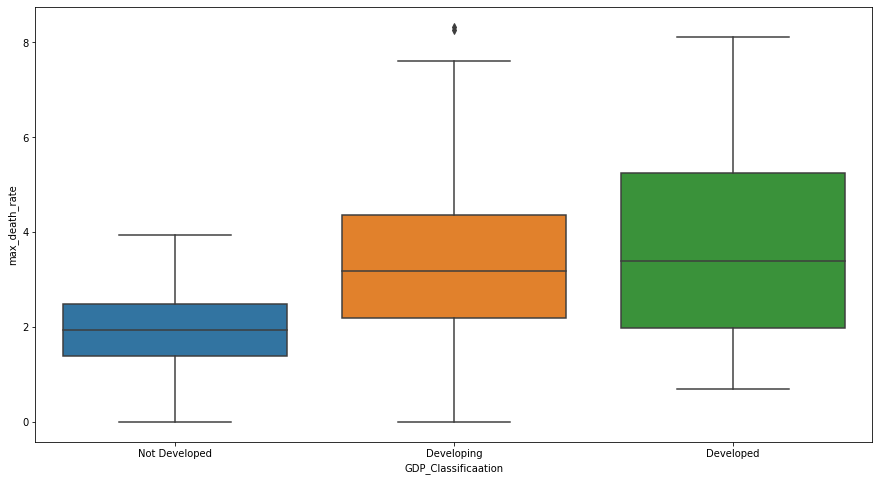

In [93]:
x = data_death["GDP_Classificaation"]
y = data_death["max_death_rate"]
plt.figure(figsize=(15,8))
sns.boxplot(x, np.log(y))

### This shows that the maximum number of deaths are there in the developing countries(0.5 < GDP per capita <= 1.0) and in developed countries(GDP per capita > 1.0)

In [88]:
data_death.describe()

,max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,236.138889,0.889590,1.201757,0.725007,0.393507
std,665.770269,0.401245,0.305274,0.234011,0.146100
min,0.000000,0.000000,0.000000,0.105000,0.000000
25%,6.000000,0.573000,1.037500,0.537250,0.302750
50%,18.000000,0.954500,1.271500,0.789000,0.417500
75%,64.000000,1.202250,1.444500,0.875750,0.508000
max,4143.000000,1.684000,1.624000,1.141000,0.631000
